In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir =pathlib.Path("model/train")

In [4]:
data_dir

WindowsPath('model/train')

In [5]:
len(list(data_dir.glob("*/*.jpg")))

28702

In [6]:
angry = list(data_dir.glob('angry/*.jpg'))

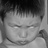

In [7]:
PIL.Image.open(str(angry[0]))

In [8]:
train_images = {
    'angry' : list(data_dir.glob('angry/*')),
    'disgust' : list(data_dir.glob('disgust/*')),
    'fear' : list(data_dir.glob('fear/*')),
    'happy' : list(data_dir.glob('happy/*')),
    'neutral' : list(data_dir.glob('neutral/*')),
    'sad' : list(data_dir.glob('sad/*')),
    'surprise' : list(data_dir.glob('surprise/*')),
}

In [9]:
train_images['angry']

[WindowsPath('model/train/angry/Training_10118481.jpg'),
 WindowsPath('model/train/angry/Training_10120469.jpg'),
 WindowsPath('model/train/angry/Training_10131352.jpg'),
 WindowsPath('model/train/angry/Training_10161559.jpg'),
 WindowsPath('model/train/angry/Training_1021836.jpg'),
 WindowsPath('model/train/angry/Training_10269675.jpg'),
 WindowsPath('model/train/angry/Training_10278738.jpg'),
 WindowsPath('model/train/angry/Training_10290703.jpg'),
 WindowsPath('model/train/angry/Training_10295477.jpg'),
 WindowsPath('model/train/angry/Training_10315441.jpg'),
 WindowsPath('model/train/angry/Training_10316849.jpg'),
 WindowsPath('model/train/angry/Training_10333072.jpg'),
 WindowsPath('model/train/angry/Training_10334355.jpg'),
 WindowsPath('model/train/angry/Training_10345473.jpg'),
 WindowsPath('model/train/angry/Training_10422050.jpg'),
 WindowsPath('model/train/angry/Training_10485618.jpg'),
 WindowsPath('model/train/angry/Training_10503476.jpg'),
 WindowsPath('model/train/angry/

In [10]:
train_labels_dict = {
     'angry'  : 0,
    'disgust'  : 1,
    'fear'  : 2,
    'happy'  : 3,
    'neutral'  : 4,
    'sad'  : 5,
    'surprise'  : 6
}

In [11]:
img = cv2.imread(str(train_images['angry'][0]))

In [12]:
img

array([[[ 50,  50,  50],
        [ 32,  32,  32],
        [ 15,  15,  15],
        ...,
        [133, 133, 133],
        [151, 151, 151],
        [ 86,  86,  86]],

       [[ 57,  57,  57],
        [ 34,  34,  34],
        [ 22,  22,  22],
        ...,
        [138, 138, 138],
        [151, 151, 151],
        [ 89,  89,  89]],

       [[ 61,  61,  61],
        [ 30,  30,  30],
        [ 24,  24,  24],
        ...,
        [142, 142, 142],
        [149, 149, 149],
        [ 89,  89,  89]],

       ...,

       [[103, 103, 103],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [149, 149, 149],
        [104, 104, 104],
        [ 85,  85,  85]],

       [[107, 107, 107],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [151, 151, 151],
        [120, 120, 120],
        [ 86,  86,  86]],

       [[104, 104, 104],
        [104, 104, 104],
        [112, 112, 112],
        ...,
        [143, 143, 143],
        [136, 136, 136],
        [ 83,  83,  83]]

In [13]:
img.shape

(48, 48, 3)

In [14]:
x, y = [], []
for emotion_name, images in train_images.items():
    for image in images:
        img = cv2.imread(str(image))
        x.append(img)
        y.append(train_labels_dict[emotion_name])

In [15]:
x

[array([[[ 50,  50,  50],
         [ 32,  32,  32],
         [ 15,  15,  15],
         ...,
         [133, 133, 133],
         [151, 151, 151],
         [ 86,  86,  86]],
 
        [[ 57,  57,  57],
         [ 34,  34,  34],
         [ 22,  22,  22],
         ...,
         [138, 138, 138],
         [151, 151, 151],
         [ 89,  89,  89]],
 
        [[ 61,  61,  61],
         [ 30,  30,  30],
         [ 24,  24,  24],
         ...,
         [142, 142, 142],
         [149, 149, 149],
         [ 89,  89,  89]],
 
        ...,
 
        [[103, 103, 103],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [149, 149, 149],
         [104, 104, 104],
         [ 85,  85,  85]],
 
        [[107, 107, 107],
         [111, 111, 111],
         [113, 113, 113],
         ...,
         [151, 151, 151],
         [120, 120, 120],
         [ 86,  86,  86]],
 
        [[104, 104, 104],
         [104, 104, 104],
         [112, 112, 112],
         ...,
         [143, 143, 143],
  

In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
x.shape

(28702, 48, 48, 3)

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
len(xtrain)

21526

In [20]:
xtrain_scale = xtrain/255
xtest_scale = xtest/255

In [21]:
xtrain_scale[0]

array([[[0.02745098, 0.02745098, 0.02745098],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.04313725, 0.04313725, 0.04313725],
        [0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.04313725, 0.04313725, 0.04313725],
        [0.05490196, 0.05490196, 0.05490196]],

       ...,

       [[0.02352941, 0.02352941, 0.02352941],
        [0.03137255, 0.03137255, 0.03137255],
        [0.08235294, 0

In [22]:
data_augment = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

CNN

In [23]:
model = Sequential([
    data_augment,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(70, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax'),
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(xtrain_scale, ytrain, epochs=10)

Epoch 1/10
673/673 [==============================] - 73s 95ms/step - loss: 1.8231 - accuracy: 0.2417
Epoch 2/10
673/673 [==============================] - 63s 94ms/step - loss: 1.7993 - accuracy: 0.2503
Epoch 3/10
673/673 [==============================] - 63s 93ms/step - loss: 1.7928 - accuracy: 0.2529
Epoch 4/10
673/673 [==============================] - 63s 94ms/step - loss: 1.7877 - accuracy: 0.2549
Epoch 5/10
673/673 [==============================] - 64s 95ms/step - loss: 1.7825 - accuracy: 0.2561
Epoch 6/10
673/673 [==============================] - 64s 96ms/step - loss: 1.7800 - accuracy: 0.2562
Epoch 7/10
673/673 [==============================] - 63s 94ms/step - loss: 1.7768 - accuracy: 0.2595
Epoch 8/10
673/673 [==============================] - 64s 96ms/step - loss: 1.7736 - accuracy: 0.2599
Epoch 9/10
673/673 [==============================] - 63s 93ms/step - loss: 1.7719 - accuracy: 0.2574
Epoch 10/10
673/673 [==============================] - 65s 96ms/step - loss: 1.769

In [24]:
model.evaluate(xtest_scale, ytest)

225/225 [==============================] - 6s 24ms/step - loss: 1.7537 - accuracy: 0.2690


[1.7536661624908447, 0.26895207166671753]

In [26]:
model.evaluate(xtrain_scale, ytrain)

673/673 [==============================] - 17s 25ms/step - loss: 1.7551 - accuracy: 0.2640


[1.755110502243042, 0.2639598548412323]